# Mini Project: Predicting Malaria Diagnosis using SGD

This project involves building a machine learning model to predict whether a person is diagnosed with malaria. Logistic Regression, optimized with Stochastic Gradient Descent (SGD), will be implemented to solve this binary classification problem. 
We will apply Stochastic Gradient Descent (SGD) to predict the likelihood of a person being diagnosed with malaria based on a set of features in a given dataset. We will implement Logistic Regression and optimize the parameters using SGD. The dataset may include features like symptoms, environmental factors, or measurements that correlate with malaria infection. The task is a binary classification problem (Malaria = 1, No Malaria = 0).

In [2]:
#import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load the dataset
# https://www.kaggle.com/datasets/programmer3/malaria-diagnosis-dataset
df = pd.read_csv('Malaria_Dataset.csv')
# display the first few rows of the dataset
print(df.head())

  IP_Number  Age     Sex Residence_Area               DOA    Discharge_Date  \
0  14xxxx31   52  Female      Mangalore  31-10-2015 20:42  05-11-2015 05:16   
1  28xxxx34   75  Female        Shimoga  03-02-2015 23:28  13-02-2015 19:27   
2  96xxxx43   30  Female      Mangalore  15-11-2019 12:31  19-11-2019 14:31   
3  49xxxx87   89  Female      Mangalore  17-05-2017 17:50  23-05-2017 13:22   
4  48xxxx10   62    Male        Shimoga  26-06-2015 15:29  27-06-2015 23:35   

   Fever  Headache  Abdominal_Pain  General_Body_Malaise  ...  Vomiting  \
0      0         0               0                     1  ...         0   
1      1         0               1                     1  ...         0   
2      1         1               1                     1  ...         0   
3      0         0               0                     0  ...         1   
4      0         1               0                     1  ...         1   

   Confusion  Backache  Chest_Pain  Coughing  Joint_Pain  Primary_Code  \


In [3]:
#summary of variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   IP_Number             1622 non-null   object
 1   Age                   1622 non-null   int64 
 2   Sex                   1622 non-null   object
 3   Residence_Area        1622 non-null   object
 4   DOA                   1622 non-null   object
 5   Discharge_Date        1622 non-null   object
 6   Fever                 1622 non-null   int64 
 7   Headache              1622 non-null   int64 
 8   Abdominal_Pain        1622 non-null   int64 
 9   General_Body_Malaise  1622 non-null   int64 
 10  Dizziness             1622 non-null   int64 
 11  Vomiting              1622 non-null   int64 
 12  Confusion             1622 non-null   int64 
 13  Backache              1622 non-null   int64 
 14  Chest_Pain            1622 non-null   int64 
 15  Coughing              1622 non-null   

In [4]:
# check for missing values and duplicates and display on same table
missing_values = df.isnull().sum()
duplicate_values = df.duplicated().sum()

summary_df = pd.DataFrame({'Missing Values': missing_values, 'Duplicate Values': [duplicate_values]*len(missing_values)})
print(summary_df)

                      Missing Values  Duplicate Values
IP_Number                          0                 0
Age                                0                 0
Sex                                0                 0
Residence_Area                     0                 0
DOA                                0                 0
Discharge_Date                     0                 0
Fever                              0                 0
Headache                           0                 0
Abdominal_Pain                     0                 0
General_Body_Malaise               0                 0
Dizziness                          0                 0
Vomiting                           0                 0
Confusion                          0                 0
Backache                           0                 0
Chest_Pain                         0                 0
Coughing                           0                 0
Joint_Pain                         0                 0
Primary_Co

In [5]:
# summary statistics of the dataset
print(df.describe())

               Age        Fever     Headache  Abdominal_Pain  \
count  1622.000000  1622.000000  1622.000000     1622.000000   
mean     44.705302     0.474723     0.507398        0.496917   
std      26.025626     0.499515     0.500099        0.500145   
min       1.000000     0.000000     0.000000        0.000000   
25%      22.000000     0.000000     0.000000        0.000000   
50%      44.000000     0.000000     1.000000        0.000000   
75%      68.000000     1.000000     1.000000        1.000000   
max      89.000000     1.000000     1.000000        1.000000   

       General_Body_Malaise    Dizziness     Vomiting    Confusion  \
count           1622.000000  1622.000000  1622.000000  1622.000000   
mean               0.479038     0.504316     0.500000     0.479655   
std                0.499714     0.500136     0.500154     0.499740   
min                0.000000     0.000000     0.000000     0.000000   
25%                0.000000     0.000000     0.000000     0.000000   
50%

In [6]:
# convert sex to numeric
# create a mapping dictionary
gender_mapping = {'Female': 0, 'Male': 1}
# apply the mapping to the 'Sex' column
df['Sex'] = df['Sex'].map(gender_mapping)

# show df
print(df.head())

  IP_Number  Age  Sex Residence_Area               DOA    Discharge_Date  \
0  14xxxx31   52    0      Mangalore  31-10-2015 20:42  05-11-2015 05:16   
1  28xxxx34   75    0        Shimoga  03-02-2015 23:28  13-02-2015 19:27   
2  96xxxx43   30    0      Mangalore  15-11-2019 12:31  19-11-2019 14:31   
3  49xxxx87   89    0      Mangalore  17-05-2017 17:50  23-05-2017 13:22   
4  48xxxx10   62    1        Shimoga  26-06-2015 15:29  27-06-2015 23:35   

   Fever  Headache  Abdominal_Pain  General_Body_Malaise  ...  Vomiting  \
0      0         0               0                     1  ...         0   
1      1         0               1                     1  ...         0   
2      1         1               1                     1  ...         0   
3      0         0               0                     0  ...         1   
4      0         1               0                     1  ...         1   

   Confusion  Backache  Chest_Pain  Coughing  Joint_Pain  Primary_Code  \
0          0      

In [7]:
# drop unnecessary columns [IP_Number, Residence_Area, DOA, Discharge_Date, Primary_Code, Diagnosis_Type]
df = df.drop(['IP_Number', 'Residence_Area', 'DOA', 'Discharge_Date', 'Primary_Code', 'Diagnosis_Type'], axis=1)
print(df.head())

   Age  Sex  Fever  Headache  Abdominal_Pain  General_Body_Malaise  Dizziness  \
0   52    0      0         0               0                     1          0   
1   75    0      1         0               1                     1          1   
2   30    0      1         1               1                     1          0   
3   89    0      0         0               0                     0          1   
4   62    1      0         1               0                     1          0   

   Vomiting  Confusion  Backache  Chest_Pain  Coughing  Joint_Pain  Target  \
0         0          0         1           0         0           0       0   
1         0          1         0           1         1           1       1   
2         0          1         1           1         0           1       1   
3         1          1         1           1         0           1       0   
4         1          1         0           0         0           0       1   

   Risk_Score  
0           3  
1          1

In [8]:
# Prepare features and target variable
X = df.drop('Target', axis=1) # Features
y = df['Target'] # Target variable

In [9]:
# Standardizing the dataset since SGD is sensitive to feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# implement logistic regression
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class SgdLogisticRegression:
    def __init__(self, lr=0.01, epochs=100, batch_size=32, verbose=False):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.loss_history = []

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)
        n_samples, n_features = X.shape
        rng = np.random.default_rng(42)
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0
        self.loss_history = []

        for epoch in range(1, self.epochs + 1):
            idx = rng.permutation(n_samples)
            X_shuffled = X[idx]
            y_shuffled = y[idx]

            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                preds = sigmoid(X_batch.dot(self.coef_) + self.intercept_)
                error = preds - y_batch
                grad_w = X_batch.T.dot(error) / len(y_batch)
                grad_b = error.mean()

                self.coef_ -= self.lr * grad_w
                self.intercept_ -= self.lr * grad_b

            # compute log-loss for monitoring
            preds_full = sigmoid(X.dot(self.coef_) + self.intercept_)
            eps = 1e-15
            loss = -np.mean(y * np.log(preds_full + eps) + (1 - y) * np.log(1 - preds_full + eps))
            self.loss_history.append(loss)
            if self.verbose and epoch % 10 == 0:
                print(f"Epoch {epoch}/{self.epochs} - Log-loss: {loss:.6f}")

    def predict_proba(self, X):
        X = np.asarray(X, dtype=float)
        z = X.dot(self.coef_) + self.intercept_
        probs = sigmoid(z)
        return np.vstack([1 - probs, probs]).T

    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)[:, 1]
        return (probs >= threshold).astype(int)

# training configuration
epochs = 100
learning_rate = 0.01
batch_size = 32

# instantiate and train the model
sgd_model = SgdLogisticRegression(lr=learning_rate, epochs=epochs, batch_size=batch_size, verbose=True)
sgd_model.fit(X_train, y_train)
loss_history = sgd_model.loss_history


Epoch 10/100 - Log-loss: 0.326674
Epoch 20/100 - Log-loss: 0.251487
Epoch 30/100 - Log-loss: 0.215209
Epoch 40/100 - Log-loss: 0.192835
Epoch 50/100 - Log-loss: 0.177276
Epoch 60/100 - Log-loss: 0.165648
Epoch 70/100 - Log-loss: 0.156489
Epoch 80/100 - Log-loss: 0.149040
Epoch 90/100 - Log-loss: 0.142803
Epoch 100/100 - Log-loss: 0.137468


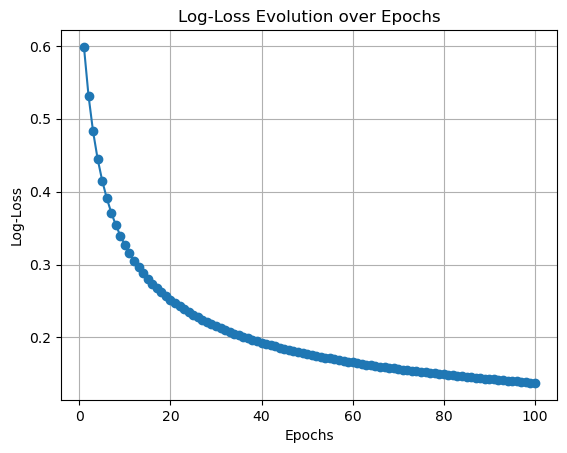

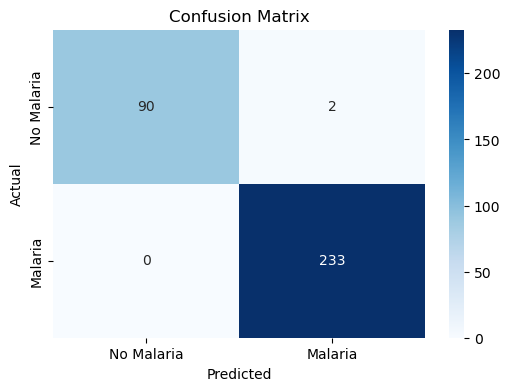

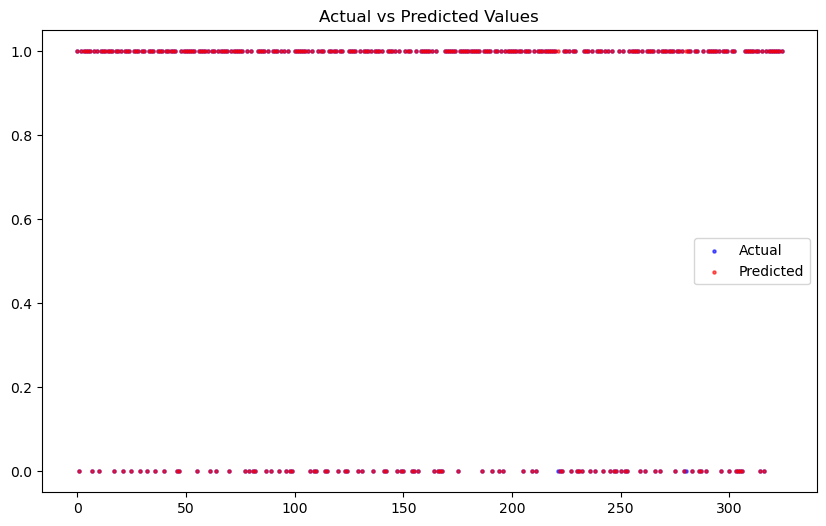

In [12]:
# log loss evolution
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.plot(range(1, epochs + 1), loss_history, marker='o')
plt.title('Log-Loss Evolution over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log-Loss')
plt.grid()
plt.show()

# confusion matrix and classification report
# make predictions
y_pred = sgd_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Malaria', 'Malaria'], yticklabels=['No Malaria', 'Malaria'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6, s=5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6, s=5)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [13]:
# make predictions
y_pred = sgd_model.predict(X_test)

# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9938
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        92
           1       0.99      1.00      1.00       233

    accuracy                           0.99       325
   macro avg       1.00      0.99      0.99       325
weighted avg       0.99      0.99      0.99       325



## Report

This report summarizes the development and evaluation of a logistic regression model designed to predict malaria diagnosis using data from the Malaria_Dataset.csv file. The dataset was preprocessed by removing non-predictive administrative columns (IP_Number, Residence_Area, DOA, Discharge_Date, Primary_Code, and Diagnosis_Type), encoding the categorical Sex feature as 0 for Female and 1 for Male, and standardizing all numerical features with StandardScaler. An 80/20 train-test split was applied with a fixed random state of 42 for reproducibility, resulting in a test set of 325 samples.

A logistic regression model was implemented from scratch, utilizing the sigmoid activation function and optimized via mini-batch stochastic gradient descent on the binary cross-entropy loss function. Training was conducted over 100 epochs with a learning rate of 0.01 and a batch size of 32, during which the log-loss steadily declined from approximately 0.60 to 0.14, demonstrating effective convergence.

The model achieved outstanding performance with an accuracy of 0.9938. The confusion matrix revealed 90 true negatives, 233 true positives, 2 false positives, and 0 false negatives, indicating near-perfect detection of malaria cases (recall of 1.00 for the positive class) and very high precision overall. The classification report further confirmed precision, recall, and F1-scores near 1.00 for both classes, with macro and weighted averages around 0.99.

Overall, the SGD-trained logistic regression model demonstrated exceptional predictive capability on this dataset split, making it highly reliable for identifying malaria cases with minimal errors.